# Data Frame Pandas - Outils

##### 1 Modifiez le dossier de travail par défaut (os.chdir).

In [1]:
import os
print(os.getcwd())

c:\Users\cpecnik\Documents\COURSES\ATELIERS\PYTHON


In [ ]:
os.chdir("./CHAP3")
print(os.getcwd())

c:\Users\cpecnik\Documents\COURSES\ATELIERS\PYTHON\CHAP3


##### 2 Chargez le classeur Excel « census_caviardee.xlsx » (pandas.read_excel). 

In [3]:
import pandas as pd

census_caviardee = pd.read_excel("census_caviardee.xlsx")
census_caviardee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48267 non-null  float64
 1   workclass       48315 non-null  object 
 2   fnlwgt          48275 non-null  float64
 3   education       48301 non-null  object 
 4   education_num   48307 non-null  float64
 5   marital_status  48296 non-null  object 
 6   occupation      48284 non-null  object 
 7   relationship    48323 non-null  object 
 8   race            48336 non-null  object 
 9   sex             48291 non-null  object 
 10  native_country  48284 non-null  object 
 11  classe          48842 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.5+ MB


Il y a 48842 observations.

Il y a 12 variables.

0   age             48267 non-null  float64
1   workclass       48315 non-null  object 
2   fnlwgt          48275 non-null  float64
3   education       48301 non-null  object 
4   education_num   48307 non-null  float64
5   marital_status  48296 non-null  object 
6   occupation      48284 non-null  object 
7   relationship    48323 non-null  object 
8   race            48336 non-null  object 
9   sex             48291 non-null  object 
10  native_country  48284 non-null  object 
11  classe          48842 non-null  object 

Oui la classe est complète.

##### 3 Affichez explicitement le type des variables (dtypes).

In [5]:
print(census_caviardee.dtypes)

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
native_country     object
classe             object
dtype: object


Il y a 3 variables quantitatives et 9 variables qualitatives.

##### 4 Comptabilisez explicitement le nombre de valeurs manquantes par colonne

In [30]:
census_caviardee.isnull().sum()

age               575
workclass         527
fnlwgt            567
education         541
education_num     535
marital_status    546
occupation        558
relationship      519
race              506
sex               551
native_country    558
classe              0
dtype: int64

##### 5 Comptabilisez le nombre de valeurs uniques par variable (nunique).

In [32]:
census_caviardee.nunique()

age                  74
workclass             8
fnlwgt            28296
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
native_country       41
classe                2
dtype: int64

##### 6 Affichez la description des variables quantitatives d’une part, qualitatives d’autre part (describe, en jouant sur les options exclude / include).

In [39]:
print(census_caviardee.describe(exclude=object))

                age        fnlwgt  education_num
count  48267.000000  4.827500e+04   48307.000000
mean      38.645037  1.896972e+05      10.078394
std       13.706049  1.056000e+05       2.570531
min       17.000000  1.228500e+04       1.000000
25%       28.000000  1.175520e+05       9.000000
50%       37.000000  1.782510e+05      10.000000
75%       48.000000  2.377130e+05      12.000000
max       90.000000  1.490400e+06      16.000000


In [35]:
print(census_caviardee.describe(exclude=float))

       workclass education      marital_status      occupation relationship  \
count      48315     48301               48296           48284        48323   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       36308     15617               22135            8882        19502   

         race    sex native_country classe  
count   48336  48291          48284  48842  
unique      5      2             41      2  
top     White   Male  United-States   less  
freq    41340  32267          44179  37155  


## Travail sur les variables quantitatives

##### 7 Isolez les variables quantitatives dans une structure spécifique (différentes approches possibles, entres autres avec select_dtypes).

In [36]:
var_quantitatives = census_caviardee.select_dtypes(float)

##### 8 Affichez les graphiques nuages de points par paire de variables (plotting.scatter_matrix).

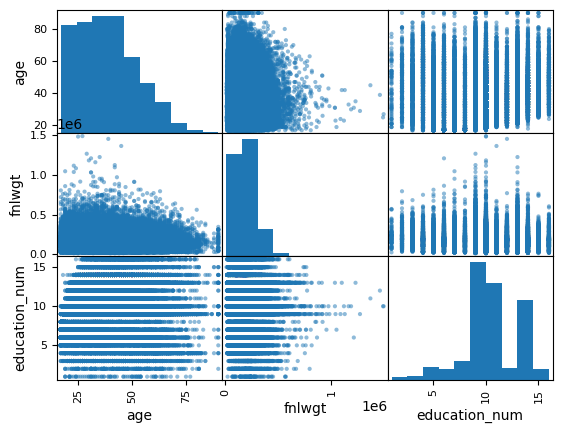

In [37]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(var_quantitatives)
plt.show()

##### 9 Calculez et affichez la matrice des corrélations (corr).

In [40]:
print(var_quantitatives.corr())

                    age    fnlwgt  education_num
age            1.000000 -0.077124       0.030753
fnlwgt        -0.077124  1.000000      -0.037208
education_num  0.030753 -0.037208       1.000000


##### 10 Affichez le graphique heatmap correspondant (de la libraire seaborn peut-être ?).

[]

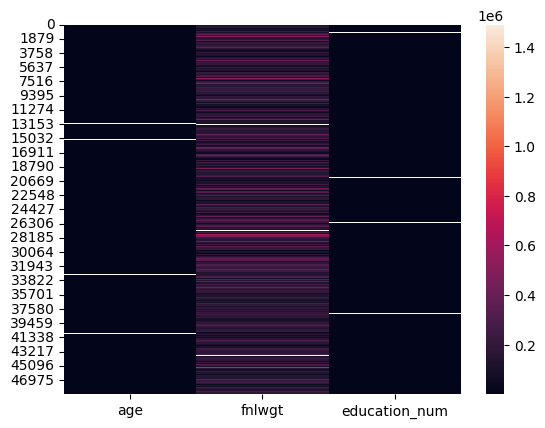

In [41]:
import seaborn as sns
sns.heatmap(var_quantitatives)
plt.plot()

## Travail sur les variables qualitatives

##### 11 Isolez les variables qualitatives dans une structure spécifique.

In [49]:
var_qualitatives = census_caviardee.select_dtypes(object)

##### 12 Affichez le barplot comptabilisant les effectifs par modalité pour la variable « workclass » (plusieurs pistes possibles avec Pandas, Matplotlib, Seaborn, essayez-les tour à tour).

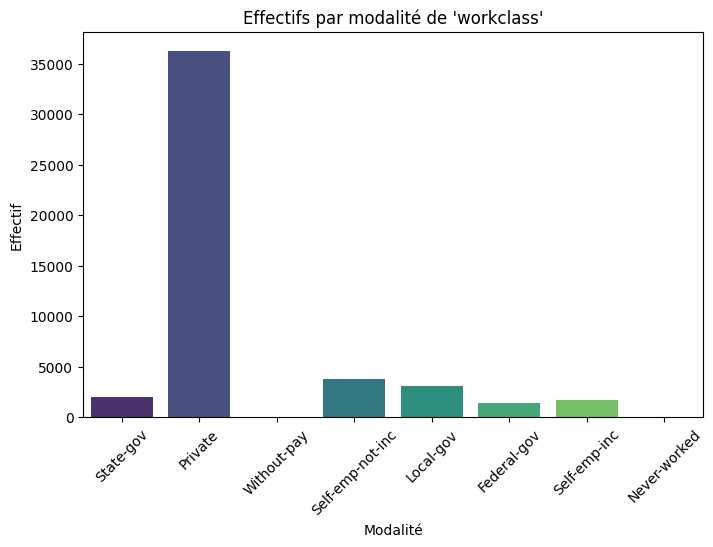

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=var_qualitatives, x="workclass", palette="viridis")

plt.title("Effectifs par modalité de 'workclass'")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
plt.xticks(rotation=45)
plt.show()

##### 13 Généralisez votre solution en affichant à la queuleuleu les barplot de toutes les variables qualitatives.

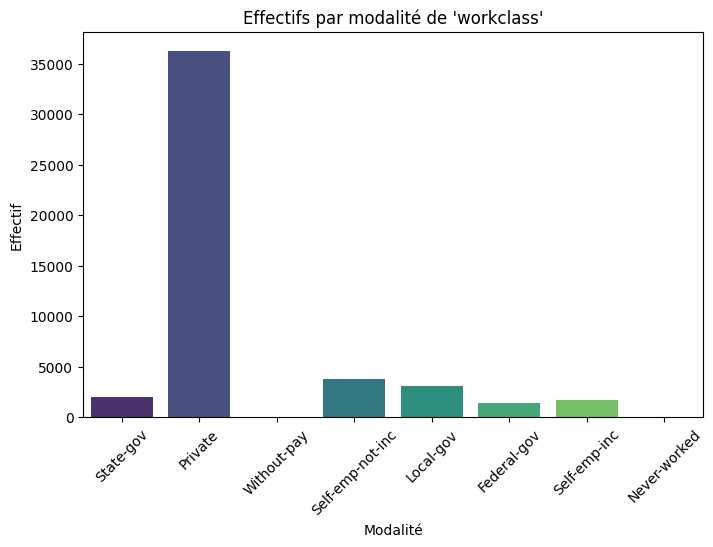

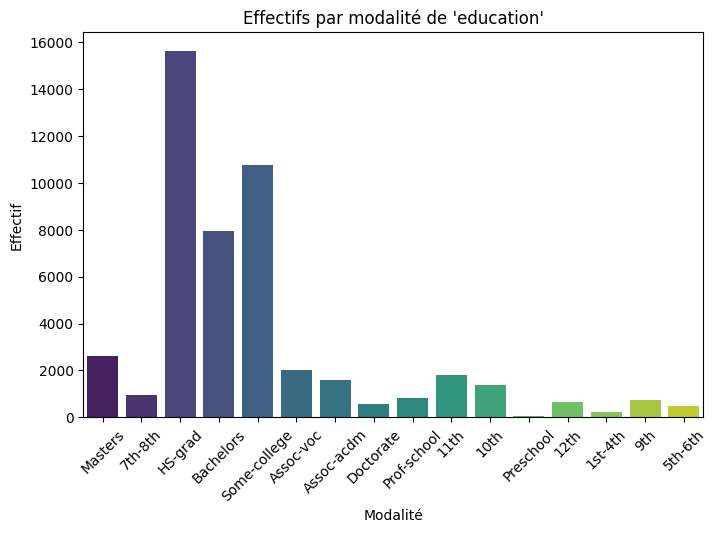

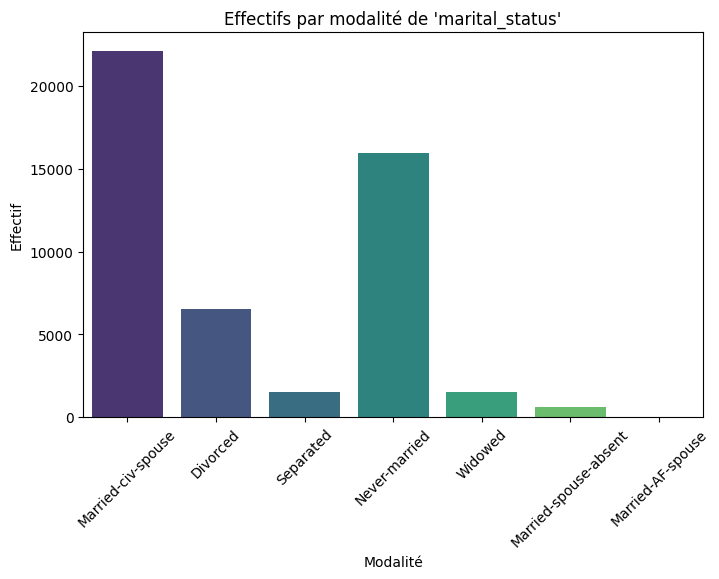

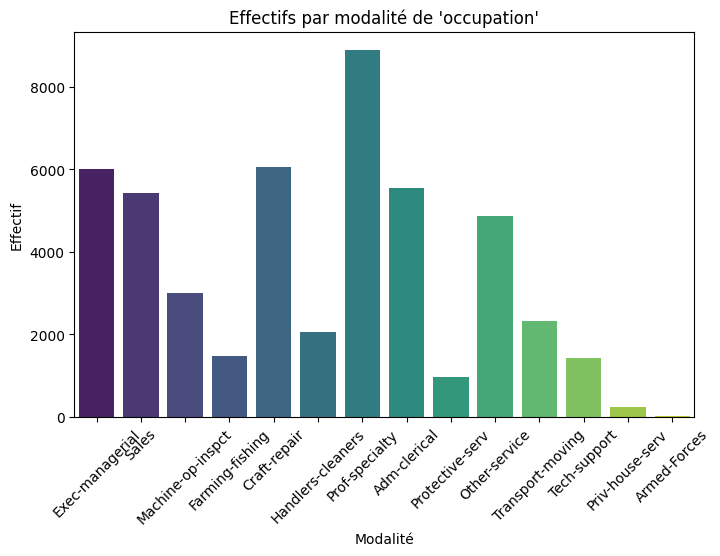

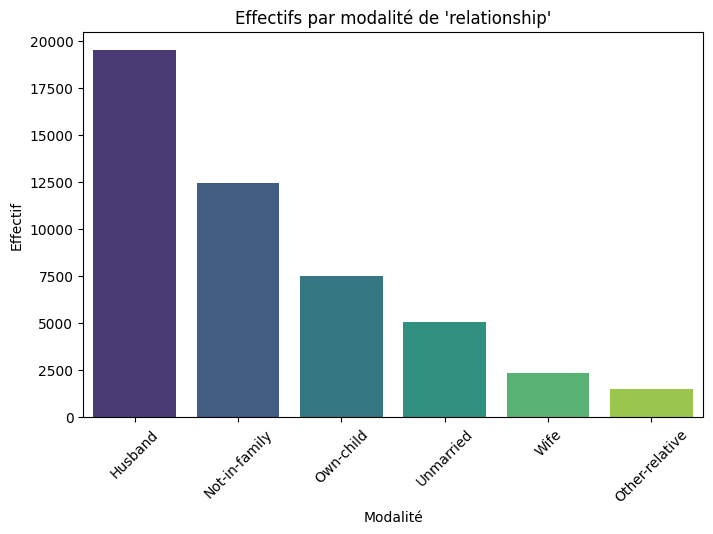

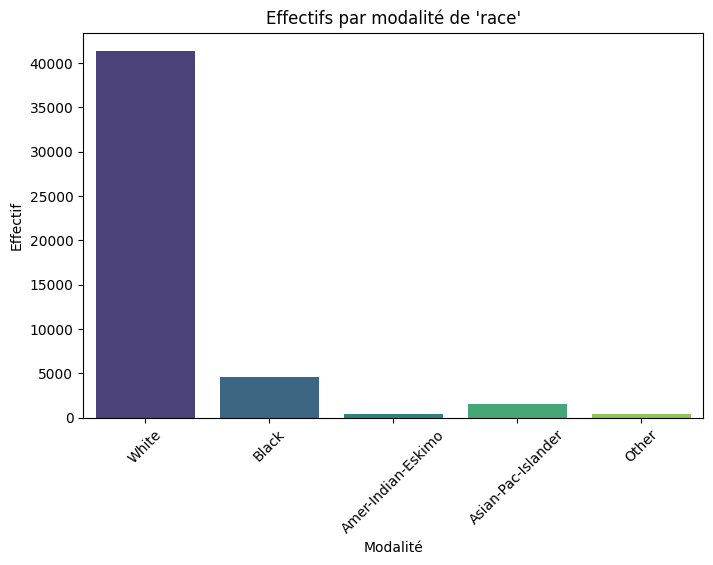

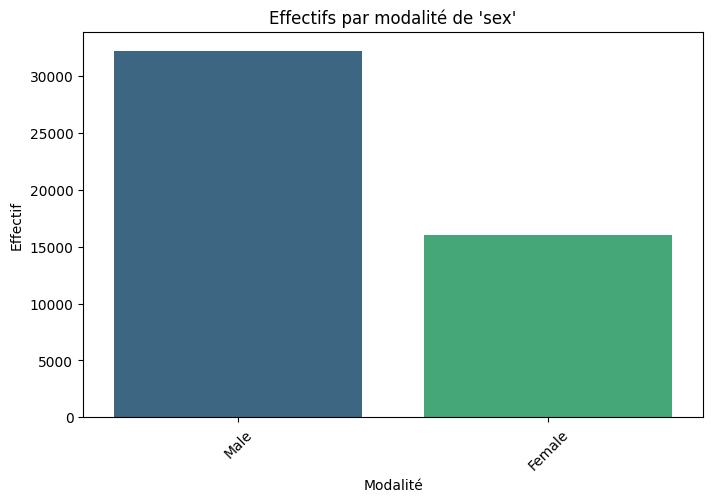

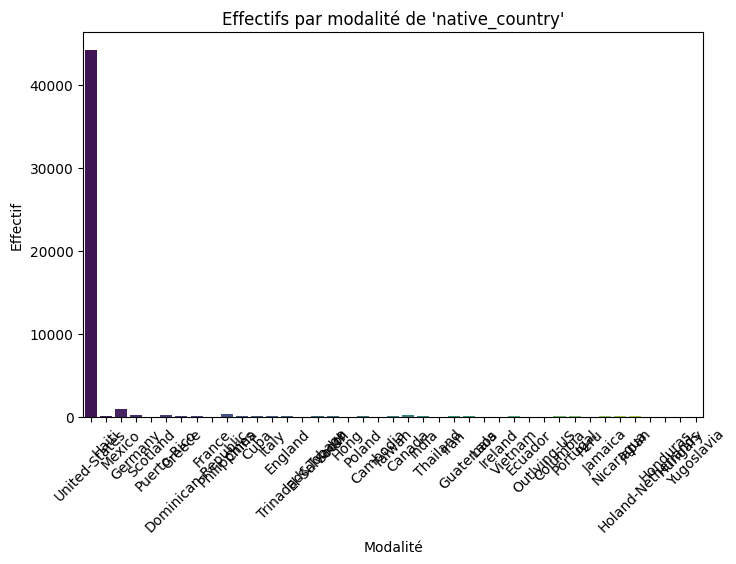

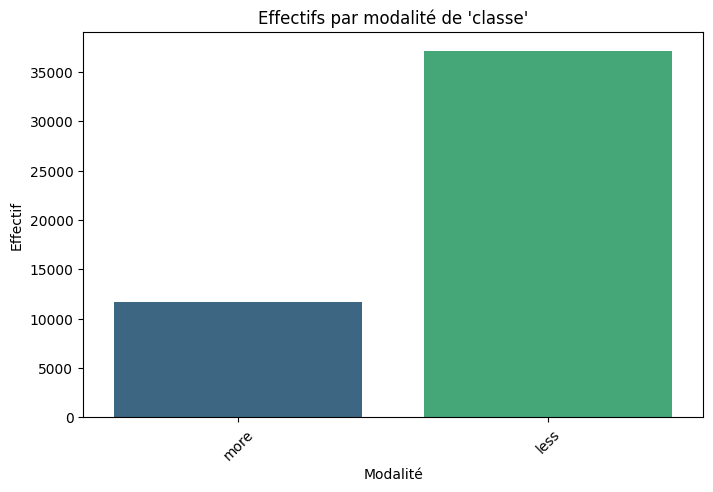

In [56]:
for index, var in enumerate(var_qualitatives):
    plt.figure(figsize=(8, 5))

    sns.countplot(data=var_qualitatives, x=var, palette="viridis")

    plt.xlabel("Modalité")
    plt.ylabel("Effectif")
    plt.xticks(rotation=45)

    plt.title(f"Effectifs par modalité de '{var}'")

    plt.show()

# ydata Profiling (anciennement Pandas Profiling)

##### 1 Importez le package « ydata_profiling », affichez le numéro de version (version de notre environnement = 4.5.1).

In [60]:
import ydata_profiling
print(ydata_profiling.__version__)

v4.5.1


##### 2 Créez un objet en instanciant la classe « ProfileReport » du package « ydata_profiling ». Vous lui passez en paramètre le data frame contenant la totalité des variables.

In [61]:
from ydata_profiling import ProfileReport
pr = ProfileReport(census_caviardee)

##### 3 Exportez le rapport dans un fichier HTML (to_file) que vous devriez retrouvez dans votre dossier de travail par défaut défini au démarrage du notebook.

In [63]:
pr.to_file(output_file="ydata Profiling")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
c:\Anaconda3\envs\envtd_quality\Lib\site-packages\ydata_profiling\profile_report.py:360: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 27.21it/s]


##### 4 Ouvrez ledit fichier HTML dans un navigateur web.

##### 5 Dupliquez le data frame initial dans une nouvelle structure (copy). Pour chaque variable, selon qu’elle est quantitative ou qualitative, remplacez les valeurs manquantes par la moyenne ou par la modalité la plus fréquente (le mode).

In [ ]:
new_structure = census_caviardee.copy()

for col in new_structure.columns:
    if new_structure[col].dtype == float:
        mean_value = new_structure[col].mean()
        new_structure[col].fillna(mean_value, inplace=True)
    else:
        mode_value = new_structure[col].mode()[0]
        new_structure[col].fillna(mode_value, inplace=True)

##### 6 Dans la nouvelle structure, comptabilisez le nombre de valeurs manquantes par colonne (il ne devrait pas y en avoir).

In [65]:
new_structure.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
classe            0
dtype: int64

##### 7 Affichez la description de toutes les variables (describe).

In [69]:
new_structure.describe()

,age,fnlwgt,education_num
count,48842.000000,4.884200e+04,48842.000000
mean,38.645037,1.896972e+05,10.078394
std,13.625130,1.049853e+05,2.556413
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.179630e+05,9.000000
50%,37.000000,1.795285e+05,10.000000
75%,48.000000,2.365685e+05,12.000000
max,90.000000,1.490400e+06,16.000000


##### 8 Construisez et affichez un second rapport « ydata Profiling » pour cette seconde structure data frame exempte de données manquantes. Etudiez-le, en particulier en le comparant au premier.

In [70]:
pr2 = ProfileReport(new_structure)
pr.to_file(output_file="ydata Profiling (new_structure)")

c:\Anaconda3\envs\envtd_quality\Lib\site-packages\ydata_profiling\profile_report.py:360: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]


# 4 Sweetviz

##### 1 Importez le package « sweetviz » et affichez le numéro de version (2.2.1 dans notre environnement).

In [71]:
import sweetviz
print(sweetviz.__version__)

2.2.1


##### 2 Créez un rapport (analyze) appliqué au jeu de données initial (comportant les valeurs manquantes). Affichez-le (show_html). Lisez attentivement le message renvoyé par la fonction concernant le rapport généré.

In [72]:
sweetviz.analyze(census_caviardee).show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 6 Nous revenons dans notre notebook. Nous souhaitons comparer les caractéristiques des données selon que l’on ait des revenus élevés (classe = more) ou non (classe = less). Scindez le data frame initial selon cette condition. Attention, la variable « classe » ne doit plus figurer dans les 2 sous-data frame générés.

In [73]:
# Scinder le DataFrame selon la variable "classe"
census_more = census_caviardee[census_caviardee["classe"] == "more"].drop(columns="classe")
census_less = census_caviardee[census_caviardee["classe"] == "less"].drop(columns="classe")

##### 7 Demandez une analyse comparative des 2 sous-dataset (compare). Affichez le rapport (show_html). Etudiez attentivement les résultats, en gardant à l’esprit que notre trame est l’analyse comparative.

In [74]:
sweetviz.compare(census_more,census_less).show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 8 Parmi les (classe = « less »), nous souhaitons comparer la situation des hommes (sex = « male ») et des femmes (sex = « female »). Sans avoir à scinder explicitement le data frame en deux parties, effectuez une nouvelle étude comparative (compare_intra). Inspectez les résultats.

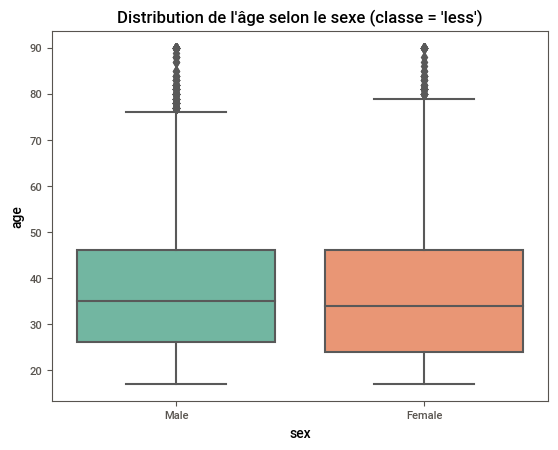

In [75]:
compare_intra = census_caviardee[census_caviardee["classe"] == "less"]

sns.boxplot(data=compare_intra, x="sex", y="age", palette="Set2")
plt.title("Distribution de l'âge selon le sexe (classe = 'less')")
plt.show()

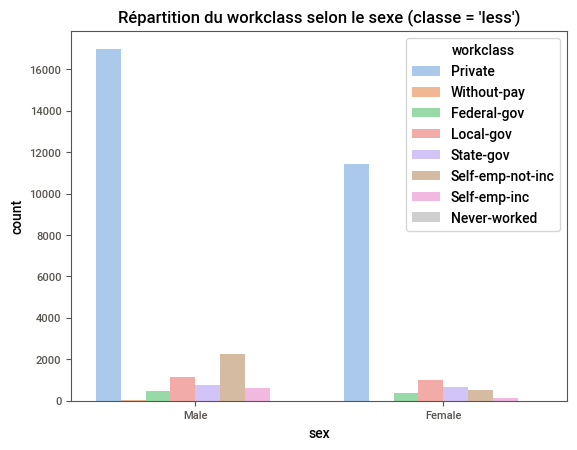

In [76]:
sns.countplot(data=compare_intra, x="sex", hue="workclass", palette="pastel")
plt.title("Répartition du workclass selon le sexe (classe = 'less')")
plt.show()

In [77]:
compare_intra.groupby("sex").mean(numeric_only=True)

,age,fnlwgt,education_num
sex,,,
Female,36.291841,185664.051031,9.823813
Male,37.247885,192746.620542,9.453989
